In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats  
import scipy.stats as st

In [3]:
data1 = pd.read_csv("../Datasets/lbnl.anon-ftp.03-01-11.csv")
data2 = pd.read_csv("../Datasets/lbnl.anon-ftp.03-01-14.csv")
data3 = pd.read_csv("../Datasets/lbnl.anon-ftp.03-01-18.csv")

In [4]:
# 1.unique server & client IPs

#unique clients
print(data1[data1.Info.str.contains('[SYN]',regex=False)].Source.unique().shape[0])
print(data2[data2.Info.str.contains('[SYN]',regex=False)].Source.unique().shape[0])
print(data3[data3.Info.str.contains('[SYN]',regex=False)].Source.unique().shape[0])

#unique servers
print(data1[data1.Info.str.contains('[SYN]',regex=False)].Destination.unique().shape[0])
print(data2[data2.Info.str.contains('[SYN]',regex=False)].Destination.unique().shape[0])
print(data3[data3.Info.str.contains('[SYN]',regex=False)].Destination.unique().shape[0])

522
939
510
45
50
89


In [5]:
# 2.unique TCP flows
data_tmp = data1[data1.Protocol.str.contains('TCP')].reset_index()
set1 = set()
for i in range(len(data_tmp)):
    #print(i)
    #print(data_tmp["Source"][i]+' '+data_tmp["Destination"][i]+' '+data_tmp["Info"][i][0:data_tmp["Info"][i].find('>')].strip()+' '+data_tmp["Info"][i][data_tmp["Info"][i].find('>')+1:data_tmp["Info"][i].find('[')-1].strip())
    set1.add(data_tmp["Source"][i]+' '+data_tmp["Destination"][i]+' '+data_tmp["Info"][i][0:data_tmp["Info"][i].find('>')].strip()+' '+data_tmp["Info"][i][data_tmp["Info"][i].find('>')+1:data_tmp["Info"][i].find('[')-1].strip())
    
print(len(set1))

data_tmp = data2[data2.Protocol.str.contains('TCP')].reset_index()
set2 = set()
for i in range(len(data_tmp)):
    #print(i)
    #print(data_tmp["Source"][i]+' '+data_tmp["Destination"][i]+' '+data_tmp["Info"][i][0:data_tmp["Info"][i].find('>')].strip()+' '+data_tmp["Info"][i][data_tmp["Info"][i].find('>')+1:data_tmp["Info"][i].find('[')-1].strip())
    set2.add(data_tmp["Source"][i]+' '+data_tmp["Destination"][i]+' '+data_tmp["Info"][i][0:data_tmp["Info"][i].find('>')].strip()+' '+data_tmp["Info"][i][data_tmp["Info"][i].find('>')+1:data_tmp["Info"][i].find('[')-1].strip())
    
print(len(set2))

data_tmp = data3[data3.Protocol.str.contains('TCP')].reset_index()
set3 = set()
for i in range(len(data_tmp)):
    #print(i)
    #print(data_tmp["Source"][i]+' '+data_tmp["Destination"][i]+' '+data_tmp["Info"][i][0:data_tmp["Info"][i].find('>')].strip()+' '+data_tmp["Info"][i][data_tmp["Info"][i].find('>')+1:data_tmp["Info"][i].find('[')-1].strip())
    set3.add(data_tmp["Source"][i]+' '+data_tmp["Destination"][i]+' '+data_tmp["Info"][i][0:data_tmp["Info"][i].find('>')].strip()+' '+data_tmp["Info"][i][data_tmp["Info"][i].find('>')+1:data_tmp["Info"][i].find('[')-1].strip())
    
print(len(set3))




3256
5422
3280


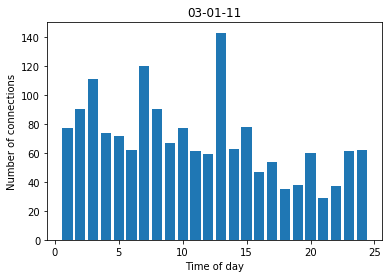

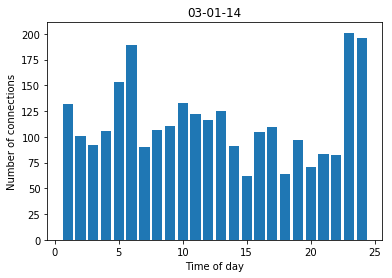

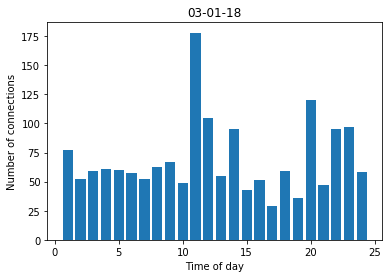

In [6]:
# 3.plot for number of TCP connections
datad = data1[data1.Info.str.contains('[SYN]',regex=False)]["Time"]
y = list()
x = list()
prev = 0
for i in range(3600,90000,3600):
    #print(datad[datad<=i].count())
    x.append(i/3600)
    #y.append(datad[datad<=i].count())
    if(i!=3600):
        y.append(datad[datad<=i].count()-prev)
        prev = datad[datad<=i].count()
    else:
        y.append(datad[datad<=i].count())
        prev = y[-1]

#print(y)
#print(x)
plt.bar(x,y)
plt.title('03-01-11')
plt.ylabel('Number of connections')
plt.xlabel('Time of day')
plt.show()

datad = data2[data2.Info.str.contains('[SYN]',regex=False)]["Time"]
y = list()
x = list()
prev = 0
for i in range(3600,90000,3600):
    #print(datad[datad<=i].count())
    x.append(i/3600)
    #y.append(datad[datad<=i].count())
    if(i!=3600):
        y.append(datad[datad<=i].count()-prev)
        prev = datad[datad<=i].count()
    else:
        y.append(datad[datad<=i].count())
        prev = y[-1]

#print(y)
#print(x)
plt.bar(x,y)
plt.title('03-01-14')
plt.ylabel('Number of connections')
plt.xlabel('Time of day')
plt.show()

datad = data3[data3.Info.str.contains('[SYN]',regex=False)]["Time"]
y = list()
x = list()
prev = 0
for i in range(3600,90000,3600):
    #print(datad[datad<=i].count())
    x.append(i/3600)
    #y.append(datad[datad<=i].count())
    if(i!=3600):
        y.append(datad[datad<=i].count()-prev)
        prev = datad[datad<=i].count()
    else:
        y.append(datad[datad<=i].count())
        prev = y[-1]

#print(y)
#print(x)
plt.bar(x,y)
plt.title('03-01-18')
plt.ylabel('Number of connections')
plt.xlabel('Time of day')
plt.show()

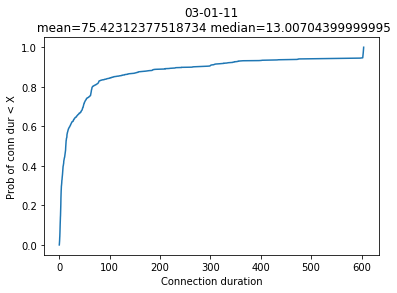

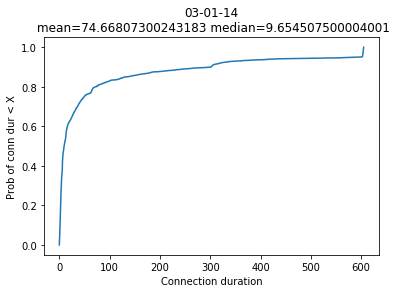

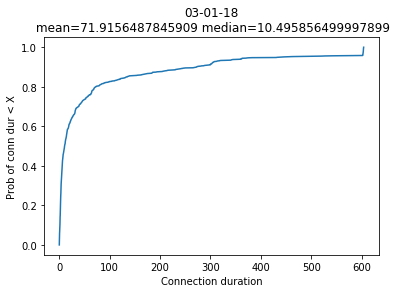

In [7]:
# 4.CDF of connection durations
data_o = data1[data1.Info.str.contains('[SYN]',regex=False)].reset_index()
data_c = data1[data1.Info.str.contains('[FIN, ACK]',regex=False)].reset_index()

Dict = {}
#data_tmp = data1[data1.Protocol.str.contains('TCP')].reset_index()
#set1 = set()
for i in range(len(data_o)):
    #print(i)
    key = data_o["Source"][i]+' '+data_o["Destination"][i]+' '+data_o["Info"][i][0:data_o["Info"][i].find('>')].strip()+' '+data_o["Info"][i][data_o["Info"][i].find('>')+1:data_o["Info"][i].find('[')-1].strip()
    value = data_o["Time"][i].astype(float)
    #set1.add(data_o["Source"][i]+' '+data_o["Destination"][i]+' '+data_o["Info"][i][0:data_o["Info"][i].find('>')].strip()+' '+data_o["Info"][i][data_o["Info"][i].find('>')+1:data_o["Info"][i].find('[')-1].strip())
    Dict[key]=value
    
res = list()
for i in range(len(data_c)):
    #print(i)
    key = data_c["Source"][i]+' '+data_c["Destination"][i]+' '+data_c["Info"][i][0:data_c["Info"][i].find('>')].strip()+' '+data_c["Info"][i][data_c["Info"][i].find('>')+1:data_c["Info"][i].find('[')-1].strip()
    value = data_c["Time"][i].astype(float)
    #set1.add(data_o["Source"][i]+' '+data_o["Destination"][i]+' '+data_o["Info"][i][0:data_o["Info"][i].find('>')].strip()+' '+data_o["Info"][i][data_o["Info"][i].find('>')+1:data_o["Info"][i].find('[')-1].strip())
    if key in Dict:
        #res.append(((Dict[key]), value))
        res.append(value-Dict[key])
    #Dict[key]=value
res = [x for x in res if x >= 0]
res.sort()
res=res[:-100]
mn = np.mean(res)
md = np.median(res)
p = 1. * np.arange(len(res)) / (len(res) - 1)
plt.plot(res, p)
plt.title('03-01-11\n mean='+str(mn)+' median='+str(md))
plt.ylabel('Prob of conn dur < X')
plt.xlabel('Connection duration')
plt.show()




data_o = data2[data2.Info.str.contains('[SYN]',regex=False)].reset_index()
data_c = data2[data2.Info.str.contains('[FIN, ACK]',regex=False)].reset_index()

Dict = {}
#data_tmp = data1[data1.Protocol.str.contains('TCP')].reset_index()
#set1 = set()
for i in range(len(data_o)):
    #print(i)
    key = data_o["Source"][i]+' '+data_o["Destination"][i]+' '+data_o["Info"][i][0:data_o["Info"][i].find('>')].strip()+' '+data_o["Info"][i][data_o["Info"][i].find('>')+1:data_o["Info"][i].find('[')-1].strip()
    value = data_o["Time"][i].astype(float)
    #set1.add(data_o["Source"][i]+' '+data_o["Destination"][i]+' '+data_o["Info"][i][0:data_o["Info"][i].find('>')].strip()+' '+data_o["Info"][i][data_o["Info"][i].find('>')+1:data_o["Info"][i].find('[')-1].strip())
    Dict[key]=value
    
res = list()
for i in range(len(data_c)):
    #print(i)
    key = data_c["Source"][i]+' '+data_c["Destination"][i]+' '+data_c["Info"][i][0:data_c["Info"][i].find('>')].strip()+' '+data_c["Info"][i][data_c["Info"][i].find('>')+1:data_c["Info"][i].find('[')-1].strip()
    value = data_c["Time"][i].astype(float)
    #set1.add(data_o["Source"][i]+' '+data_o["Destination"][i]+' '+data_o["Info"][i][0:data_o["Info"][i].find('>')].strip()+' '+data_o["Info"][i][data_o["Info"][i].find('>')+1:data_o["Info"][i].find('[')-1].strip())
    if key in Dict:
        #res.append(((Dict[key]), value))
        res.append(value-Dict[key])
    #Dict[key]=value
res = [x for x in res if x >= 0]
res.sort()
res=res[:-100]
mn = np.mean(res)
md = np.median(res)
p = 1. * np.arange(len(res)) / (len(res) - 1)
plt.plot(res, p)
plt.title('03-01-14\n mean='+str(mn)+' median='+str(md))
plt.ylabel('Prob of conn dur < X')
plt.xlabel('Connection duration')
plt.show()





data_o = data3[data3.Info.str.contains('[SYN]',regex=False)].reset_index()
data_c = data3[data3.Info.str.contains('[FIN, ACK]',regex=False)].reset_index()

Dict = {}
#data_tmp = data1[data1.Protocol.str.contains('TCP')].reset_index()
#set1 = set()
for i in range(len(data_o)):
    #print(i)
    key = data_o["Source"][i]+' '+data_o["Destination"][i]+' '+data_o["Info"][i][0:data_o["Info"][i].find('>')].strip()+' '+data_o["Info"][i][data_o["Info"][i].find('>')+1:data_o["Info"][i].find('[')-1].strip()
    value = data_o["Time"][i].astype(float)
    #set1.add(data_o["Source"][i]+' '+data_o["Destination"][i]+' '+data_o["Info"][i][0:data_o["Info"][i].find('>')].strip()+' '+data_o["Info"][i][data_o["Info"][i].find('>')+1:data_o["Info"][i].find('[')-1].strip())
    Dict[key]=value
    
res = list()
for i in range(len(data_c)):
    #print(i)
    key = data_c["Source"][i]+' '+data_c["Destination"][i]+' '+data_c["Info"][i][0:data_c["Info"][i].find('>')].strip()+' '+data_c["Info"][i][data_c["Info"][i].find('>')+1:data_c["Info"][i].find('[')-1].strip()
    value = data_c["Time"][i].astype(float)
    #set1.add(data_o["Source"][i]+' '+data_o["Destination"][i]+' '+data_o["Info"][i][0:data_o["Info"][i].find('>')].strip()+' '+data_o["Info"][i][data_o["Info"][i].find('>')+1:data_o["Info"][i].find('[')-1].strip())
    if key in Dict:
        #res.append(((Dict[key]), value))
        res.append(value-Dict[key])
    #Dict[key]=value
res = [x for x in res if x >= 0]
res.sort()
res=res[:-100]
mn = np.mean(res)
md = np.median(res)
p = 1. * np.arange(len(res)) / (len(res) - 1)
plt.plot(res, p)
plt.title('03-01-18\n mean='+str(mn)+' median='+str(md))
plt.ylabel('Prob of conn dur < X')
plt.xlabel('Connection duration')
plt.show()

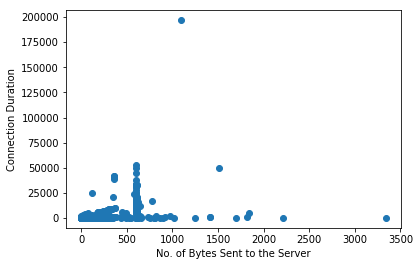

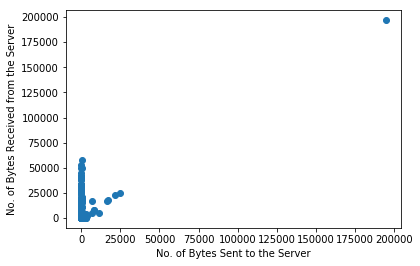

In [34]:
# 5.Correlation
data_o = data3[data3.Info.str.contains('[SYN]',regex=False)].reset_index()
data_s = data3[data3.Protocol.str.contains('TCP')].reset_index()
data_c = data3[data3.Info.str.contains('[FIN, ACK]',regex=False)].reset_index()

Dict = {}
Dict_cl = {}
Dict_se = {}
#data_tmp = data1[data1.Protocol.str.contains('TCP')].reset_index()
#set1 = set()
for i in range(len(data_o)):
    #print(i)
    key = data_o["Source"][i]+' '+data_o["Destination"][i]+' '+data_o["Info"][i][0:data_o["Info"][i].find('>')].strip()+' '+data_o["Info"][i][data_o["Info"][i].find('>')+1:data_o["Info"][i].find('[')-1].strip()
    value = data_o["Time"][i].astype(float)
    key_se = data_o["Destination"][i]+' '+data_o["Source"][i]+' '+data_o["Info"][i][data_o["Info"][i].find('>')+1:data_o["Info"][i].find('[')-1].strip()+' '+data_o["Info"][i][0:data_o["Info"][i].find('>')].strip()
    #value_cl = data_o["Length"][i].astype(float)
    Dict_cl[key] = 0
    Dict_se[key_se] = 0
    Dict[key]=-1*value
    
for i in range(len(data_s)):
    #print(i)
    key = data_s["Source"][i]+' '+data_s["Destination"][i]+' '+data_s["Info"][i][0:data_s["Info"][i].find('>')].strip()+' '+data_s["Info"][i][data_s["Info"][i].find('>')+1:data_s["Info"][i].find('[')-1].strip()
    value = data_s["Length"][i].astype(float)
    if key in Dict_cl:
        Dict_cl[key] = Dict_cl[key]+value
    elif key in Dict_se:
        Dict_se[key] = Dict_se[key]+value


res = list()

for i in range(len(data_c)):
    #print(i)
    key = data_c["Source"][i]+' '+data_c["Destination"][i]+' '+data_c["Info"][i][0:data_c["Info"][i].find('>')].strip()+' '+data_c["Info"][i][data_c["Info"][i].find('>')+1:data_c["Info"][i].find('[')-1].strip()
    value = data_c["Time"][i].astype(float)
    #set1.add(data_o["Source"][i]+' '+data_o["Destination"][i]+' '+data_o["Info"][i][0:data_o["Info"][i].find('>')].strip()+' '+data_o["Info"][i][data_o["Info"][i].find('>')+1:data_o["Info"][i].find('[')-1].strip())
    if key in Dict:
        #res.append(((Dict[key]), value))
        if(value+Dict[key]>0):
            Dict[key] = value+Dict[key]
        else:
            del Dict[key]

Dict = dict((k, v) for k, v in Dict.items() if v >= 0)


x=list()
y=list()
xx=list()
yy=list()
for k,v in Dict.items():
    if k in Dict_cl:
        #if v<100 and Dict_cl[k]<1000:
        x.append(v)
        y.append(Dict_cl[k])
#x = [t for t in x,y if t < 2*np.median(x)]
#y = [t for t in y if t < 2*np.median(y)]
for i in range(len(x)):
    if(x[i]<2*np.median(x) and y[i]<2*np.median(y)):
        xx.append(x[i])
        yy.append(y[i])
#plt.scatter(xx,yy)
plt.scatter(x,y)
plt.xlabel("No. of Bytes Sent to the Server")
plt.ylabel("Connection Duration")
plt.show()


x=list()
y=list()
for k,v in Dict_se.items():
    a=k.split(' ')
    k_dash = a[1]+' '+a[0]+' '+a[3]+' '+a[2]
    if k_dash in Dict_cl:
        #if v<100 and Dict_cl[k]<1000:
        x.append(v)
        y.append(Dict_cl[k_dash])
plt.scatter(x,y)
plt.xlabel("No. of Bytes Sent to the Server")
plt.ylabel("No. of Bytes Received from the Server")
plt.show()

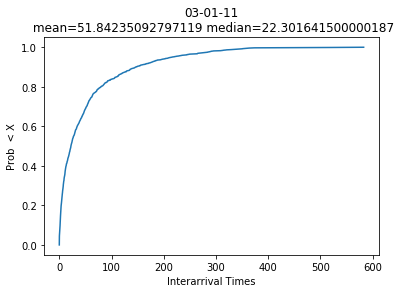

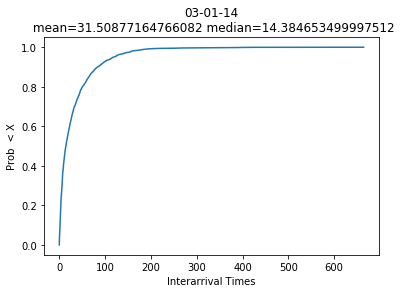

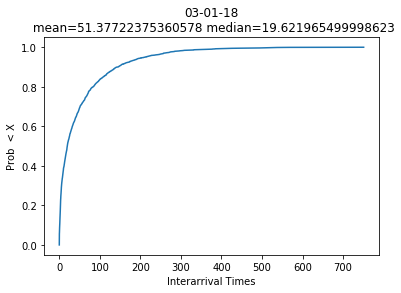

In [9]:
# 6.CDF of SYN
data_o = data1[data1.Info.str.contains('[SYN]',regex=False)].reset_index()
yy = list()
y = list()
for i in range(len(data_o)):
    y.append(data_o["Time"][i].astype(float))
for i in range(len(y)-1):
    yy.append(y[i+1]-y[i])
yy.sort()

p = 1. * np.arange(len(yy)) / (len(yy) - 1)
plt.plot(yy, p)
mn = np.mean(yy)
md = np.median(yy)
plt.title('03-01-11\n mean='+str(mn)+' median='+str(md))
plt.ylabel('Prob  < X')
plt.xlabel('Interarrival Times')
plt.show()

data_o = data2[data2.Info.str.contains('[SYN]',regex=False)].reset_index()
yy = list()
y = list()
for i in range(len(data_o)):
    y.append(data_o["Time"][i].astype(float))
for i in range(len(y)-1):
    yy.append(y[i+1]-y[i])
yy.sort()

p = 1. * np.arange(len(yy)) / (len(yy) - 1)
plt.plot(yy, p)
mn = np.mean(yy)
md = np.median(yy)
plt.title('03-01-14\n mean='+str(mn)+' median='+str(md))
plt.ylabel('Prob  < X')
plt.xlabel('Interarrival Times')
plt.show()

data_o = data3[data3.Info.str.contains('[SYN]',regex=False)].reset_index()
yy = list()
y = list()
for i in range(len(data_o)):
    y.append(data_o["Time"][i].astype(float))
for i in range(len(y)-1):
    yy.append(y[i+1]-y[i])
yy.sort()

p = 1. * np.arange(len(yy)) / (len(yy) - 1)
plt.plot(yy, p)
mn = np.mean(yy)
md = np.median(yy)
plt.title('03-01-18\n mean='+str(mn)+' median='+str(md))
plt.ylabel('Prob  < X')
plt.xlabel('Interarrival Times')
plt.show()




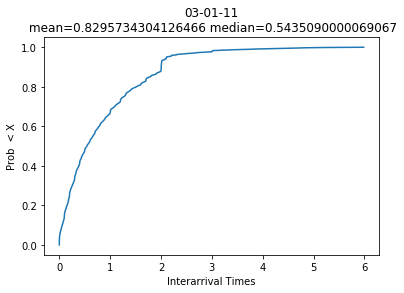

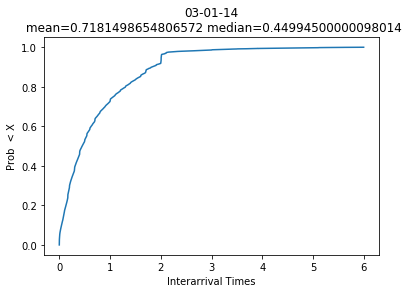

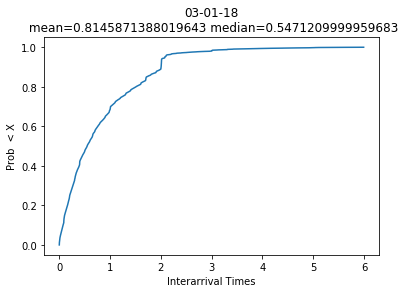

In [10]:
# 7.CDF of incoming to SERVER
data_o = data1[data1.Info.str.contains('[SYN]',regex=False)].reset_index()

yy = list()
y = list()
xy = list()
for i in range(len(data_o)):
    key = data_o["Source"][i]+' '+data_o["Destination"][i]+' '+data_o["Info"][i][0:data_o["Info"][i].find('>')].strip()+' '+data_o["Info"][i][data_o["Info"][i].find('>')+1:data_o["Info"][i].find('[')-1].strip()
    y.append(key)

data_o = data1[data1.Protocol.str.contains('TCP')].reset_index()
for i in range(len(data_o)):
    key = data_o["Source"][i]+' '+data_o["Destination"][i]+' '+data_o["Info"][i][0:data_o["Info"][i].find('>')].strip()+' '+data_o["Info"][i][data_o["Info"][i].find('>')+1:data_o["Info"][i].find('[')-1].strip()
    if key in y:
        xy.append(data_o["Time"][i].astype(float))
        
for i in range(len(xy)-1):
    yy.append(xy[i+1]-xy[i])
yy.sort()
yy = [i for i in yy if i<6]

p = 1. * np.arange(len(yy)) / (len(yy) - 1)
plt.plot(yy, p)
mn = np.mean(yy)
md = np.median(yy)
plt.title('03-01-11\n mean='+str(mn)+' median='+str(md))
plt.ylabel('Prob  < X')
plt.xlabel('Interarrival Times')
plt.show()



data_o = data2[data2.Info.str.contains('[SYN]',regex=False)].reset_index()

yy = list()
y = list()
xy = list()
for i in range(len(data_o)):
    key = data_o["Source"][i]+' '+data_o["Destination"][i]+' '+data_o["Info"][i][0:data_o["Info"][i].find('>')].strip()+' '+data_o["Info"][i][data_o["Info"][i].find('>')+1:data_o["Info"][i].find('[')-1].strip()
    y.append(key)

data_o = data2[data2.Protocol.str.contains('TCP')].reset_index()
for i in range(len(data_o)):
    key = data_o["Source"][i]+' '+data_o["Destination"][i]+' '+data_o["Info"][i][0:data_o["Info"][i].find('>')].strip()+' '+data_o["Info"][i][data_o["Info"][i].find('>')+1:data_o["Info"][i].find('[')-1].strip()
    if key in y:
        xy.append(data_o["Time"][i].astype(float))
        
for i in range(len(xy)-1):
    yy.append(xy[i+1]-xy[i])
yy.sort()
yy = [i for i in yy if i<6]

p = 1. * np.arange(len(yy)) / (len(yy) - 1)
plt.plot(yy, p)
mn = np.mean(yy)
md = np.median(yy)
plt.title('03-01-14\n mean='+str(mn)+' median='+str(md))
plt.ylabel('Prob  < X')
plt.xlabel('Interarrival Times')
plt.show()



data_o = data3[data3.Info.str.contains('[SYN]',regex=False)].reset_index()

yy = list()
y = list()
xy = list()
for i in range(len(data_o)):
    key = data_o["Source"][i]+' '+data_o["Destination"][i]+' '+data_o["Info"][i][0:data_o["Info"][i].find('>')].strip()+' '+data_o["Info"][i][data_o["Info"][i].find('>')+1:data_o["Info"][i].find('[')-1].strip()
    y.append(key)

data_o = data3[data3.Protocol.str.contains('TCP')].reset_index()
for i in range(len(data_o)):
    key = data_o["Source"][i]+' '+data_o["Destination"][i]+' '+data_o["Info"][i][0:data_o["Info"][i].find('>')].strip()+' '+data_o["Info"][i][data_o["Info"][i].find('>')+1:data_o["Info"][i].find('[')-1].strip()
    if key in y:
        xy.append(data_o["Time"][i].astype(float))
        
for i in range(len(xy)-1):
    yy.append(xy[i+1]-xy[i])
yy.sort()
yy = [i for i in yy if i<6]
p = 1. * np.arange(len(yy)) / (len(yy) - 1)
plt.plot(yy, p)
mn = np.mean(yy)
md = np.median(yy)
plt.title('03-01-18\n mean='+str(mn)+' median='+str(md))
plt.ylabel('Prob  < X')
plt.xlabel('Interarrival Times')
plt.show()

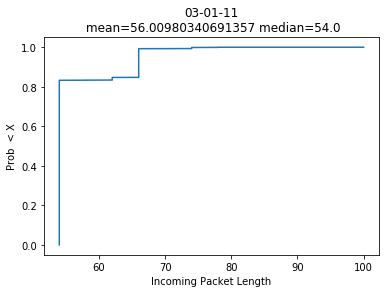

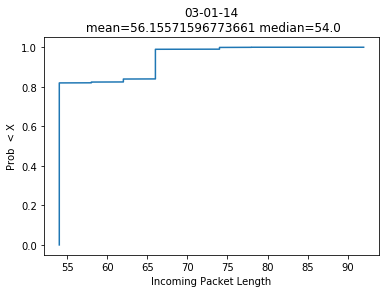

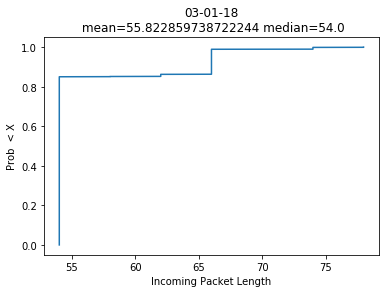

In [11]:
# 8.CDF of incoming packet length
data_o = data1[data1.Info.str.contains('[SYN]',regex=False)].reset_index()

yy = list()
y = list()
#xy = list()
for i in range(len(data_o)):
    key = data_o["Source"][i]+' '+data_o["Destination"][i]+' '+data_o["Info"][i][0:data_o["Info"][i].find('>')].strip()+' '+data_o["Info"][i][data_o["Info"][i].find('>')+1:data_o["Info"][i].find('[')-1].strip()
    y.append(key)

data_o = data1[data1.Protocol.str.contains('TCP')].reset_index()
for i in range(len(data_o)):
    key = data_o["Source"][i]+' '+data_o["Destination"][i]+' '+data_o["Info"][i][0:data_o["Info"][i].find('>')].strip()+' '+data_o["Info"][i][data_o["Info"][i].find('>')+1:data_o["Info"][i].find('[')-1].strip()
    if key in y:
        yy.append(data_o["Length"][i].astype(float))
        
yy.sort()
p = 1. * np.arange(len(yy)) / (len(yy) - 1)
plt.plot(yy, p)
mn = np.mean(yy)
md = np.median(yy)
plt.title('03-01-11\n mean='+str(mn)+' median='+str(md))
plt.ylabel('Prob  < X')
plt.xlabel('Incoming Packet Length')
plt.show()



data_o = data2[data2.Info.str.contains('[SYN]',regex=False)].reset_index()

yy = list()
y = list()
#xy = list()
for i in range(len(data_o)):
    key = data_o["Source"][i]+' '+data_o["Destination"][i]+' '+data_o["Info"][i][0:data_o["Info"][i].find('>')].strip()+' '+data_o["Info"][i][data_o["Info"][i].find('>')+1:data_o["Info"][i].find('[')-1].strip()
    y.append(key)

data_o = data2[data2.Protocol.str.contains('TCP')].reset_index()
for i in range(len(data_o)):
    key = data_o["Source"][i]+' '+data_o["Destination"][i]+' '+data_o["Info"][i][0:data_o["Info"][i].find('>')].strip()+' '+data_o["Info"][i][data_o["Info"][i].find('>')+1:data_o["Info"][i].find('[')-1].strip()
    if key in y:
        yy.append(data_o["Length"][i].astype(float))
        
yy.sort()

p = 1. * np.arange(len(yy)) / (len(yy) - 1)
plt.plot(yy, p)
mn = np.mean(yy)
md = np.median(yy)
plt.title('03-01-14\n mean='+str(mn)+' median='+str(md))
plt.ylabel('Prob  < X')
plt.xlabel('Incoming Packet Length')
plt.show()



data_o = data3[data3.Info.str.contains('[SYN]',regex=False)].reset_index()

yy = list()
y = list()
#xy = list()
for i in range(len(data_o)):
    key = data_o["Source"][i]+' '+data_o["Destination"][i]+' '+data_o["Info"][i][0:data_o["Info"][i].find('>')].strip()+' '+data_o["Info"][i][data_o["Info"][i].find('>')+1:data_o["Info"][i].find('[')-1].strip()
    y.append(key)

data_o = data3[data3.Protocol.str.contains('TCP')].reset_index()
for i in range(len(data_o)):
    key = data_o["Source"][i]+' '+data_o["Destination"][i]+' '+data_o["Info"][i][0:data_o["Info"][i].find('>')].strip()+' '+data_o["Info"][i][data_o["Info"][i].find('>')+1:data_o["Info"][i].find('[')-1].strip()
    if key in y:
        yy.append(data_o["Length"][i].astype(float))
        
yy.sort()

p = 1. * np.arange(len(yy)) / (len(yy) - 1)
plt.plot(yy, p)
mn = np.mean(yy)
md = np.median(yy)
plt.title('03-01-18\n mean='+str(mn)+' median='+str(md))
plt.ylabel('Prob  < X')
plt.xlabel('Incoming Packet Length')
plt.show()

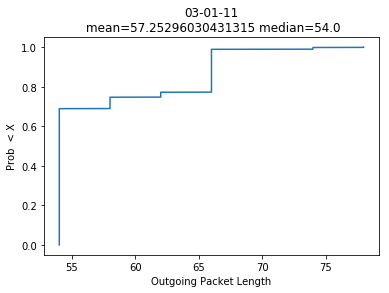

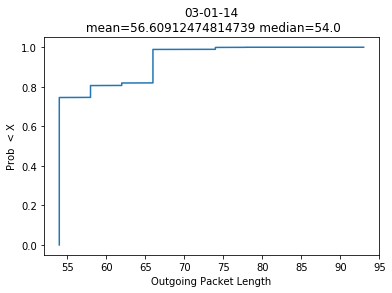

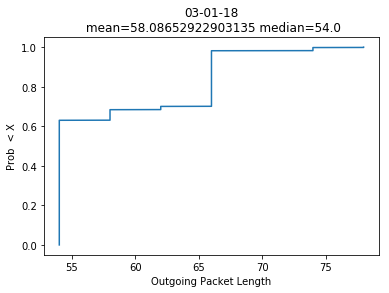

In [13]:
# 8.CDF of outgoing packet length
data_o = data1[data1.Info.str.contains('[SYN, ACK]',regex=False)].reset_index()

yy = list()
y = list()
#xy = list()
for i in range(len(data_o)):
    key = data_o["Source"][i]+' '+data_o["Destination"][i]+' '+data_o["Info"][i][0:data_o["Info"][i].find('>')].strip()+' '+data_o["Info"][i][data_o["Info"][i].find('>')+1:data_o["Info"][i].find('[')-1].strip()
    y.append(key)

data_o = data1[data1.Protocol.str.contains('TCP')].reset_index()
for i in range(len(data_o)):
    key = data_o["Source"][i]+' '+data_o["Destination"][i]+' '+data_o["Info"][i][0:data_o["Info"][i].find('>')].strip()+' '+data_o["Info"][i][data_o["Info"][i].find('>')+1:data_o["Info"][i].find('[')-1].strip()
    if key in y:
        yy.append(data_o["Length"][i].astype(float))
        
yy.sort()
p = 1. * np.arange(len(yy)) / (len(yy) - 1)
plt.plot(yy, p)
mn = np.mean(yy)
md = np.median(yy)
plt.title('03-01-11\n mean='+str(mn)+' median='+str(md))
plt.ylabel('Prob  < X')
plt.xlabel('Outgoing Packet Length')
plt.show()



data_o = data2[data2.Info.str.contains('[SYN, ACK]',regex=False)].reset_index()

yy = list()
y = list()
#xy = list()
for i in range(len(data_o)):
    key = data_o["Source"][i]+' '+data_o["Destination"][i]+' '+data_o["Info"][i][0:data_o["Info"][i].find('>')].strip()+' '+data_o["Info"][i][data_o["Info"][i].find('>')+1:data_o["Info"][i].find('[')-1].strip()
    y.append(key)

data_o = data2[data2.Protocol.str.contains('TCP')].reset_index()
for i in range(len(data_o)):
    key = data_o["Source"][i]+' '+data_o["Destination"][i]+' '+data_o["Info"][i][0:data_o["Info"][i].find('>')].strip()+' '+data_o["Info"][i][data_o["Info"][i].find('>')+1:data_o["Info"][i].find('[')-1].strip()
    if key in y:
        yy.append(data_o["Length"][i].astype(float))
        
yy.sort()

p = 1. * np.arange(len(yy)) / (len(yy) - 1)
plt.plot(yy, p)
mn = np.mean(yy)
md = np.median(yy)
plt.title('03-01-14\n mean='+str(mn)+' median='+str(md))
plt.ylabel('Prob  < X')
plt.xlabel('Outgoing Packet Length')
plt.show()



data_o = data3[data3.Info.str.contains('[SYN, ACK]',regex=False)].reset_index()

yy = list()
y = list()
#xy = list()
for i in range(len(data_o)):
    key = data_o["Source"][i]+' '+data_o["Destination"][i]+' '+data_o["Info"][i][0:data_o["Info"][i].find('>')].strip()+' '+data_o["Info"][i][data_o["Info"][i].find('>')+1:data_o["Info"][i].find('[')-1].strip()
    y.append(key)

data_o = data3[data3.Protocol.str.contains('TCP')].reset_index()
for i in range(len(data_o)):
    key = data_o["Source"][i]+' '+data_o["Destination"][i]+' '+data_o["Info"][i][0:data_o["Info"][i].find('>')].strip()+' '+data_o["Info"][i][data_o["Info"][i].find('>')+1:data_o["Info"][i].find('[')-1].strip()
    if key in y:
        yy.append(data_o["Length"][i].astype(float))
        
yy.sort()

p = 1. * np.arange(len(yy)) / (len(yy) - 1)
plt.plot(yy, p)
mn = np.mean(yy)
md = np.median(yy)
plt.title('03-01-18\n mean='+str(mn)+' median='+str(md))
plt.ylabel('Prob  < X')
plt.xlabel('Outgoing Packet Length')
plt.show()



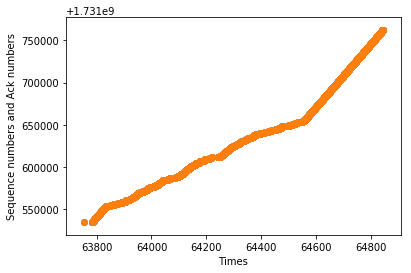

In [31]:
# 9. Tool
data_o = data3[data3.Protocol.str.contains('TCP')].reset_index()
client_ip = '171.1.7.162'
server_ip = '128.3.28.48'
client_port = '33682'
server_port = '21'

cl = client_ip+' '+server_ip+' '+client_port+' '+server_port
se = server_ip+' '+client_ip+' '+server_port+' '+client_port
clist = list()
slist = list()
ctime = list()
stime = list()

for i in range(len(data_o)):
    key = data_o["Source"][i]+' '+data_o["Destination"][i]+' '+data_o["Info"][i][0:data_o["Info"][i].find('>')].strip()+' '+data_o["Info"][i][data_o["Info"][i].find('>')+1:data_o["Info"][i].find('[')-1].strip()
    if(key==cl and data_o["Info"][i].find('Ack')!=-1):
        #print(i)
        #print(data_o["Info"][i][data_o["Info"][i].find('Ack')+4:data_o["Info"][i].find('Win')-1].strip())
        clist.append(int(data_o["Info"][i][data_o["Info"][i].find('Ack')+4:data_o["Info"][i].find('Win')-1].strip()))
        ctime.append(data_o["Time"][i].astype(float))
    elif(key==se and data_o["Info"][i].find('Ack')!=-1):
        slist.append(int(data_o["Info"][i][data_o["Info"][i].find('Seq')+4:data_o["Info"][i].find('Ack')-1].strip()))
        stime.append(data_o["Time"][i].astype(float))
        
plt.scatter(ctime,clist)
plt.scatter(stime,slist)
plt.xlabel("Times")
plt.ylabel("Sequence numbers and Ack numbers")
plt.show()

0.0 51.84235092797119
51.84235092797119 74.48032317547579
1.7004312462006066 -0.3266867596557656 18.038994387688962


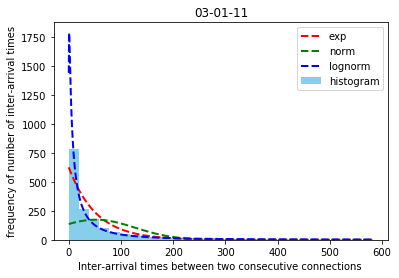

0.0 31.50877164766082
31.50877164766082 45.02624291039452
1.4619920135974123 -0.36960548138320665 13.35898425167829


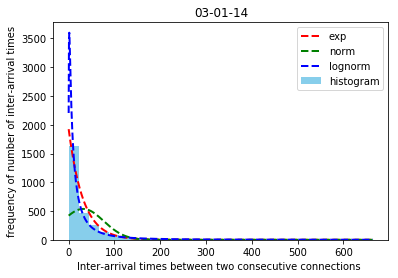

1.0000003385357559e-06 51.377222753605444
51.37722375360578 77.83938176925382
1.9013075332794243 -0.14713089527574763 15.079280112267412


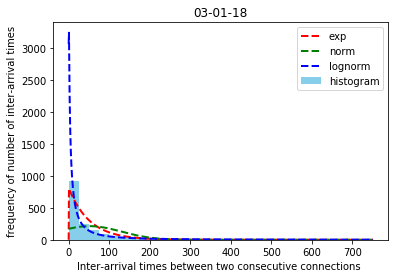

In [22]:
# 10. PDF fitting for question 6th
data_o = data1[data1.Info.str.contains('[SYN]',regex=False)].reset_index()
yy = list()
y = list()
for i in range(len(data_o)):
    y.append(data_o["Time"][i].astype(float))
for i in range(len(y)-1):
    yy.append(y[i+1]-y[i])
yy.sort()
mn = np.mean(yy)
md = np.median(yy)
xx = np.linspace(0.,max(yy),1000)
dist_exp = st.expon.pdf(xx, *st.expon.fit(yy))
dist_norm = st.norm.pdf(xx,*st.norm.fit(yy))
dist_lognorm = st.lognorm.pdf(xx,*st.lognorm.fit(yy))
print(*st.expon.fit(yy))
print(*st.norm.fit(yy))
print(*st.lognorm.fit(yy))
nbins = 30
fig, ax = plt.subplots(1, 1, figsize=(6, 4))
ax.hist(yy, nbins,color = 'skyblue',label='histogram')
ax.plot(xx, dist_exp * len(yy) * max(yy) / nbins,'--r', lw=2, label='exp')
ax.plot(xx, dist_norm * len(yy) * max(yy) / nbins,'--g', lw=2, label='norm')
ax.plot(xx, dist_lognorm * len(yy) * max(yy) / nbins,'--b', lw=2, label='lognorm')
ax.set_xlabel("Inter-arrival times between two consecutive connections ")
ax.set_ylabel("frequency of number of inter-arrival times")
ax.legend()
plt.title('03-01-11')
plt.show()



data_o = data2[data2.Info.str.contains('[SYN]',regex=False)].reset_index()
yy = list()
y = list()
for i in range(len(data_o)):
    y.append(data_o["Time"][i].astype(float))
for i in range(len(y)-1):
    yy.append(y[i+1]-y[i])
yy.sort()
mn = np.mean(yy)
md = np.median(yy)
xx = np.linspace(0.,max(yy),1000)
dist_exp = st.expon.pdf(xx, *st.expon.fit(yy))
dist_norm = st.norm.pdf(xx,*st.norm.fit(yy))
dist_lognorm = st.lognorm.pdf(xx,*st.lognorm.fit(yy))
print(*st.expon.fit(yy))
print(*st.norm.fit(yy))
print(*st.lognorm.fit(yy))
nbins = 30
fig, ax = plt.subplots(1, 1, figsize=(6, 4))
ax.hist(yy, nbins,color = 'skyblue',label='histogram')
ax.plot(xx, dist_exp * len(yy) * max(yy) / nbins,'--r', lw=2, label='exp')
ax.plot(xx, dist_norm * len(yy) * max(yy) / nbins,'--g', lw=2, label='norm')
ax.plot(xx, dist_lognorm * len(yy) * max(yy) / nbins,'--b', lw=2, label='lognorm')
ax.set_xlabel("Inter-arrival times between two consecutive connections ")
ax.set_ylabel("frequency of number of inter-arrival times")
ax.legend()
plt.title('03-01-14')
plt.show()




data_o = data3[data3.Info.str.contains('[SYN]',regex=False)].reset_index()
yy = list()
y = list()
for i in range(len(data_o)):
    y.append(data_o["Time"][i].astype(float))
for i in range(len(y)-1):
    yy.append(y[i+1]-y[i])
yy.sort()
mn = np.mean(yy)
md = np.median(yy)
xx = np.linspace(0.,max(yy),1000)
dist_exp = st.expon.pdf(xx, *st.expon.fit(yy))
dist_norm = st.norm.pdf(xx,*st.norm.fit(yy))
dist_lognorm = st.lognorm.pdf(xx,*st.lognorm.fit(yy))
print(*st.expon.fit(yy))
print(*st.norm.fit(yy))
print(*st.lognorm.fit(yy))
nbins = 30
fig, ax = plt.subplots(1, 1, figsize=(6, 4))
ax.hist(yy, nbins,color = 'skyblue',label='histogram')
ax.plot(xx, dist_exp * len(yy) * max(yy) / nbins,'--r', lw=2, label='exp')
ax.plot(xx, dist_norm * len(yy) * max(yy) / nbins,'--g', lw=2, label='norm')
ax.plot(xx, dist_lognorm * len(yy) * max(yy) / nbins,'--b', lw=2, label='lognorm')
ax.set_xlabel("Inter-arrival times between two consecutive connections ")
ax.set_ylabel("frequency of number of inter-arrival times")
ax.legend()
plt.title('03-01-18')
plt.show()

0.0 0.8295734304126466
0.8295734304126466 0.825869195765223
1.0631719084375482 -0.060918520938647594 0.5531504746540603


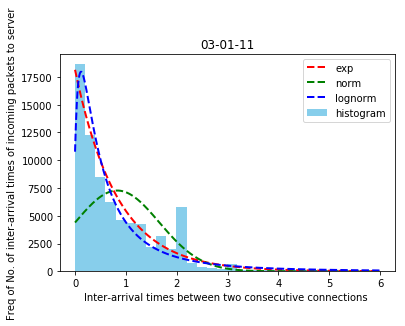

0.0 0.7181498654806572
0.7181498654806572 0.7516120717906161
1.1098618744735862 -0.044069796521834216 0.4540307618172925


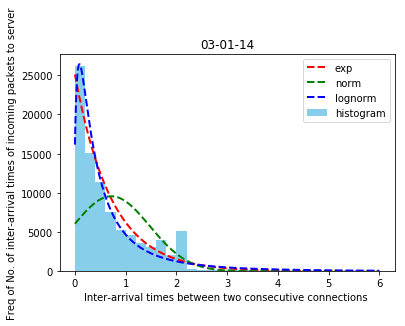

0.0 0.8145871388019643
0.8145871388019643 0.7915521195626273
1.0230117218501713 -0.05939572568300847 0.5584904548995082


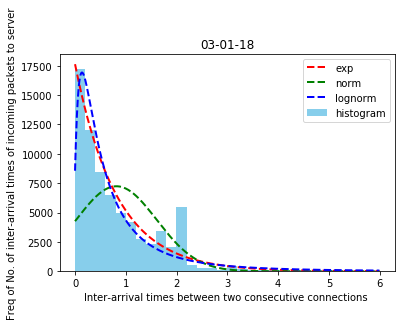

In [21]:
#10. PDF fitting for question 7th
data_o = data1[data1.Info.str.contains('[SYN]',regex=False)].reset_index()

yy = list()
y = list()
xy = list()
for i in range(len(data_o)):
    key = data_o["Source"][i]+' '+data_o["Destination"][i]+' '+data_o["Info"][i][0:data_o["Info"][i].find('>')].strip()+' '+data_o["Info"][i][data_o["Info"][i].find('>')+1:data_o["Info"][i].find('[')-1].strip()
    y.append(key)

data_o = data1[data1.Protocol.str.contains('TCP')].reset_index()
for i in range(len(data_o)):
    key = data_o["Source"][i]+' '+data_o["Destination"][i]+' '+data_o["Info"][i][0:data_o["Info"][i].find('>')].strip()+' '+data_o["Info"][i][data_o["Info"][i].find('>')+1:data_o["Info"][i].find('[')-1].strip()
    if key in y:
        xy.append(data_o["Time"][i].astype(float))
        
for i in range(len(xy)-1):
    yy.append(xy[i+1]-xy[i])
yy.sort()
yy = [i for i in yy if i<6]
xx = np.linspace(0.,max(yy),1000)
dist_exp = st.expon.pdf(xx, *st.expon.fit(yy))
dist_norm = st.norm.pdf(xx,*st.norm.fit(yy))
dist_lognorm = st.lognorm.pdf(xx,*st.lognorm.fit(yy))
print(*st.expon.fit(yy))
print(*st.norm.fit(yy))
print(*st.lognorm.fit(yy))
nbins = 30
fig, ax = plt.subplots(1, 1, figsize=(6, 4))
ax.hist(yy, nbins,color = 'skyblue',label='histogram')
ax.plot(xx, dist_exp * len(yy) * max(yy) / nbins,'--r', lw=2, label='exp')
ax.plot(xx, dist_norm * len(yy) * max(yy) / nbins,'--g', lw=2, label='norm')
ax.plot(xx, dist_lognorm * len(yy) * max(yy) / nbins,'--b', lw=2, label='lognorm')
ax.set_xlabel("Inter-arrival times between two consecutive connections ")
ax.set_ylabel("Freq of No. of inter-arrival times of incoming packets to server")
ax.legend()
plt.title('03-01-11')
plt.show()


data_o = data2[data2.Info.str.contains('[SYN]',regex=False)].reset_index()

yy = list()
y = list()
xy = list()
for i in range(len(data_o)):
    key = data_o["Source"][i]+' '+data_o["Destination"][i]+' '+data_o["Info"][i][0:data_o["Info"][i].find('>')].strip()+' '+data_o["Info"][i][data_o["Info"][i].find('>')+1:data_o["Info"][i].find('[')-1].strip()
    y.append(key)

data_o = data2[data2.Protocol.str.contains('TCP')].reset_index()
for i in range(len(data_o)):
    key = data_o["Source"][i]+' '+data_o["Destination"][i]+' '+data_o["Info"][i][0:data_o["Info"][i].find('>')].strip()+' '+data_o["Info"][i][data_o["Info"][i].find('>')+1:data_o["Info"][i].find('[')-1].strip()
    if key in y:
        xy.append(data_o["Time"][i].astype(float))
        
for i in range(len(xy)-1):
    yy.append(xy[i+1]-xy[i])
yy.sort()
yy = [i for i in yy if i<6]
xx = np.linspace(0.,max(yy),1000)
dist_exp = st.expon.pdf(xx, *st.expon.fit(yy))
dist_norm = st.norm.pdf(xx,*st.norm.fit(yy))
dist_lognorm = st.lognorm.pdf(xx,*st.lognorm.fit(yy))
print(*st.expon.fit(yy))
print(*st.norm.fit(yy))
print(*st.lognorm.fit(yy))
nbins = 30
fig, ax = plt.subplots(1, 1, figsize=(6, 4))
ax.hist(yy, nbins,color = 'skyblue',label='histogram')
ax.plot(xx, dist_exp * len(yy) * max(yy) / nbins,'--r', lw=2, label='exp')
ax.plot(xx, dist_norm * len(yy) * max(yy) / nbins,'--g', lw=2, label='norm')
ax.plot(xx, dist_lognorm * len(yy) * max(yy) / nbins,'--b', lw=2, label='lognorm')
ax.set_xlabel("Inter-arrival times between two consecutive connections ")
ax.set_ylabel("Freq of No. of inter-arrival times of incoming packets to server")
ax.legend()
plt.title('03-01-14')
plt.show()



data_o = data3[data3.Info.str.contains('[SYN]',regex=False)].reset_index()

yy = list()
y = list()
xy = list()
for i in range(len(data_o)):
    key = data_o["Source"][i]+' '+data_o["Destination"][i]+' '+data_o["Info"][i][0:data_o["Info"][i].find('>')].strip()+' '+data_o["Info"][i][data_o["Info"][i].find('>')+1:data_o["Info"][i].find('[')-1].strip()
    y.append(key)

data_o = data3[data3.Protocol.str.contains('TCP')].reset_index()
for i in range(len(data_o)):
    key = data_o["Source"][i]+' '+data_o["Destination"][i]+' '+data_o["Info"][i][0:data_o["Info"][i].find('>')].strip()+' '+data_o["Info"][i][data_o["Info"][i].find('>')+1:data_o["Info"][i].find('[')-1].strip()
    if key in y:
        xy.append(data_o["Time"][i].astype(float))
        
for i in range(len(xy)-1):
    yy.append(xy[i+1]-xy[i])
yy.sort()
yy = [i for i in yy if i<6]
xx = np.linspace(0.,max(yy),1000)
dist_exp = st.expon.pdf(xx, *st.expon.fit(yy))
dist_norm = st.norm.pdf(xx,*st.norm.fit(yy))
dist_lognorm = st.lognorm.pdf(xx,*st.lognorm.fit(yy))
print(*st.expon.fit(yy))
print(*st.norm.fit(yy))
print(*st.lognorm.fit(yy))
nbins = 30
fig, ax = plt.subplots(1, 1, figsize=(6, 4))
ax.hist(yy, nbins,color = 'skyblue',label='histogram')
ax.plot(xx, dist_exp * len(yy) * max(yy) / nbins,'--r', lw=2, label='exp')
ax.plot(xx, dist_norm * len(yy) * max(yy) / nbins,'--g', lw=2, label='norm')
ax.plot(xx, dist_lognorm * len(yy) * max(yy) / nbins,'--b', lw=2, label='lognorm')
ax.set_xlabel("Inter-arrival times between two consecutive connections ")
ax.set_ylabel("Freq of No. of inter-arrival times of incoming packets to server")
ax.legend()
plt.title('03-01-18')
plt.show()


In [19]:
#11. queue setup
lambda_inv = [51.8423, 31.5087, 51.3772] #these are the mean interarrival time or inverse of lambdas found in previous parts
lambdas = [1/x for x in lambda_inv]
mean_packet_size = [57.2529, 56.6091, 58.0865] #these are the mean packet sizes found in 8th question
transmit_data_speed = 128*1000/8
mu = [transmit_data_speed/x for x in mean_packet_size]
rho = [(l/m) for l,m in zip(lambdas, mu)]
avg_queue_size = [x/(1-x) for x in rho]
avg_waiting_time = [(1/(m-l))-(1/m) for l,m in zip(lambdas,mu)]
print("lambda           = "+str(lambdas))
print("mu               = "+str(mu))
print("rho              = "+str(rho))
print("avg_queue_size   = "+str(avg_queue_size))
print("avg_waiting_time = "+str(avg_waiting_time))

lambda           = [0.019289267644375347, 0.03173726621536274, 0.01946388670460827]
mu               = [279.46182638783364, 282.64007023605745, 275.451266645434]
rho              = [6.902290696979108e-05, 0.00011228862980700568, 7.066181594170177e-05]
avg_queue_size   = [6.902767146033662e-05, 0.00011230123995936635, 7.066680938677985e-05]
avg_waiting_time = [2.470021482092223e-07, 3.973295076863982e-07, 2.565492264652164e-07]


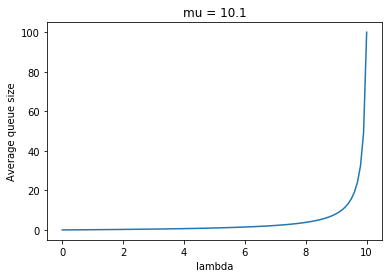

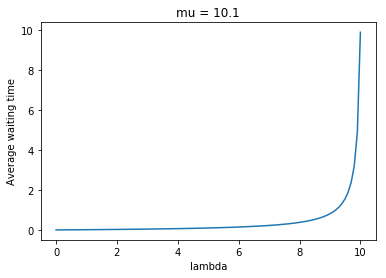

In [20]:
#11. plot for (avg. queue size v/s lambda) and (avg. waiting time v/s lambda)
l = np.linspace(0,10,100)
mu = l[-1]+0.1
size = [x/(mu-x) for x in l]
plt.plot(l,size)
plt.xlabel('lambda')
plt.ylabel('Average queue size')
plt.title("mu = "+str(mu))
plt.show()


time = [(1/(mu-x))-(1/mu) for x in l]
plt.plot(l,time)
plt.xlabel('lambda')
plt.ylabel('Average waiting time')
plt.title("mu = "+str(mu))
plt.show()